# Etivity 3: John O'Reilly<br/>
22254773

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [56]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
# Find and print the max and min values for each column to check scaling
# max_values = df.max()
# min_values = df.min()
# print("Max values:")
# print(max_values)
# print("\nMin values:")
# print(min_values)
# Find and print the max and min values for overall array
print("Max values:")
print(np.max(data))
print("\nMin values:")
print(np.min(data))



(number of examples, number of attributes):  (614, 16)
Max values:
3.357479763

Min values:
0.0


### B. Rescale the Data
Rescaling is not required as the dataset is already scaled. I tried scaling to see if there was any improvement but no.

In [21]:
# using this standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
# # Find and print the max and min values for each column to check scaling
# max_values = np.max(data)
# min_values = np.min(data)
# print("Max values:")
# print(np.max(data))
# print("\nMin values:")
# print(np.min(data))

Max values:
3.357479763

Min values:
0.0


### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [5]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

Find the best value for k using two methods 
 1. Elbow Method; plots the within-cluster sum of squared distances for different k values. Optimum is indicated where the k value starts to decrease at a slower rate. This "elbow" point represents the optimal number of clusters.

In [63]:
# just guess
k = 3


In [71]:
# Getting warnings about memory leak in Kmeans, dowloaded latest version but not fixed
# so just going to supress the warning
import warnings
warnings.filterwarnings("ignore")

Optimal number of clusters (k): 9


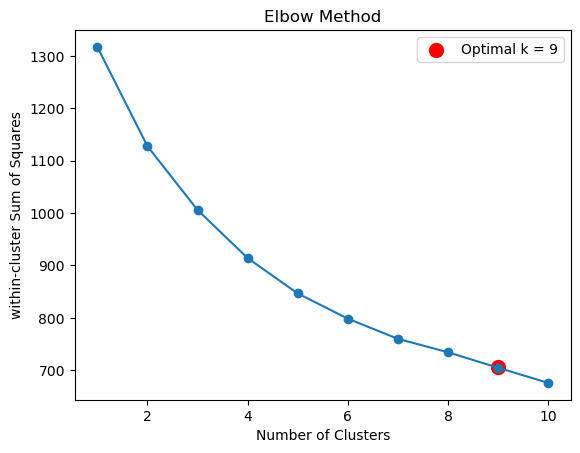

In [75]:
from sklearn.cluster import KMeans
# Calculate the within-cluster sum of squared distances (inertia) for different k values
arr_inertias=[]
max_clusters=10
for k in range(1,max_clusters + 1):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(data)
    arr_inertias.append(kmeans.inertia_)
# Use the elbow method to find the optimal k value
# Calculate the difference in inertia and find the index with the greatest 
diff_inertia = np.diff(arr_inertias)
optimal_k = np.argmax(diff_inertia)+2
# show optimum k on plot as red circle
circle_x = optimal_k
circle_y = arr_inertias[optimal_k - 1]
print("Optimal number of clusters (k):", optimal_k)
# Plot to show the elbow point
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster Sum of Squares')
plt.title('Elbow Method')
# plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(circle_x, circle_y, c='r', marker='o', s=100, label=f'Optimal k = {optimal_k}')
plt.legend()

Looking at the plot the elbow point is not immediately obvious

2. Silhouette method<br/> Evaluates the similarity of points within each cluster and the dissimilarity of points between different clusters.

Optimum k: 17


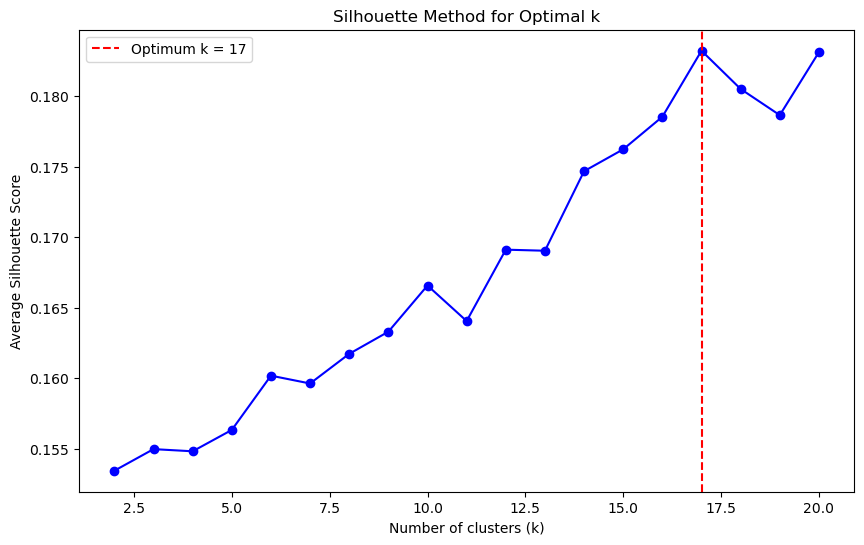

In [81]:
from sklearn.metrics import silhouette_score
K=range(2,21)
n_init=10  # Number of times to run k-means 
avg_silhouette_scores=[]
for k in K:
    arr_scores=[]
    for i in range(n_init):
        kmeans=KMeans(n_clusters=k,init='random')
        kmeans.fit(data)
        cluster_labels=kmeans.labels_
        arr_scores.append(silhouette_score(data, cluster_labels))
    avg_silhouette_scores.append(np.mean(arr_scores))
# Identify the optimum k value
opt_k = K[np.argmax(avg_silhouette_scores)]
print("Optimum k:", opt_k)
# Plot silhouette scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(K, avg_silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.axvline(x=opt_k, color='r', linestyle='--', label=f'Optimum k = {opt_k}')
plt.legend()
plt.show()

This is too many clusters for my liking I will limit it to max 10 I think

#### Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

In [64]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

c:\Users\jonco\.conda\envs\env_et3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [65]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [66]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

c:\Users\jonco\.conda\envs\env_et3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.


transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

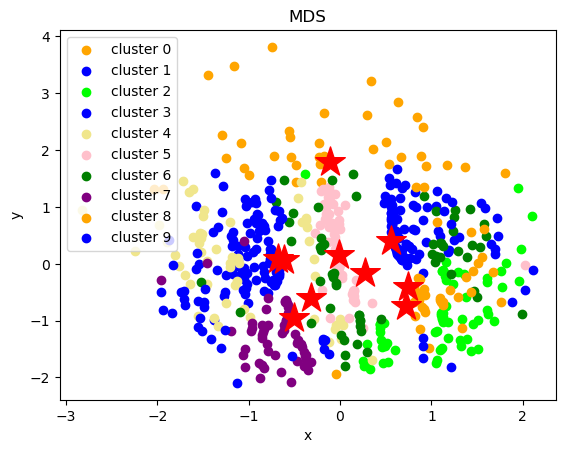

In [67]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

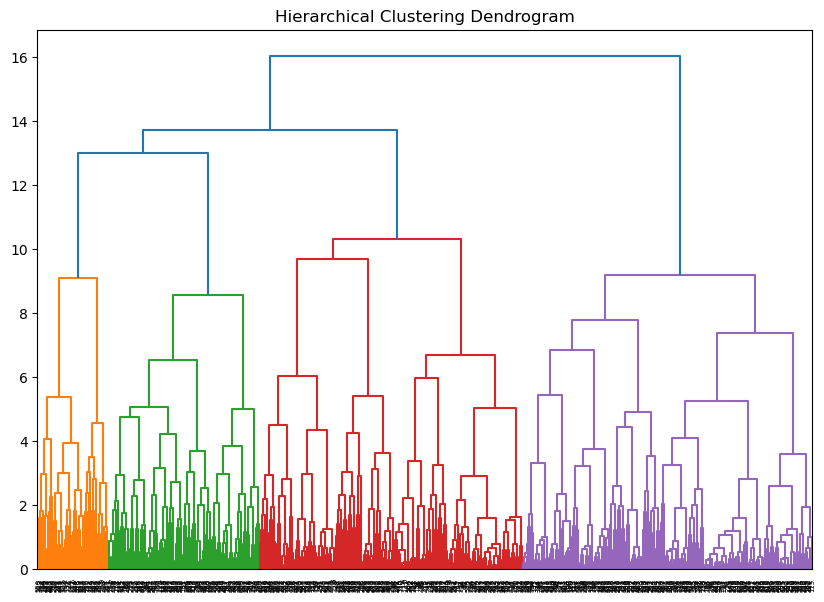

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using the 'ward' method
linked = linkage(data, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [68]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

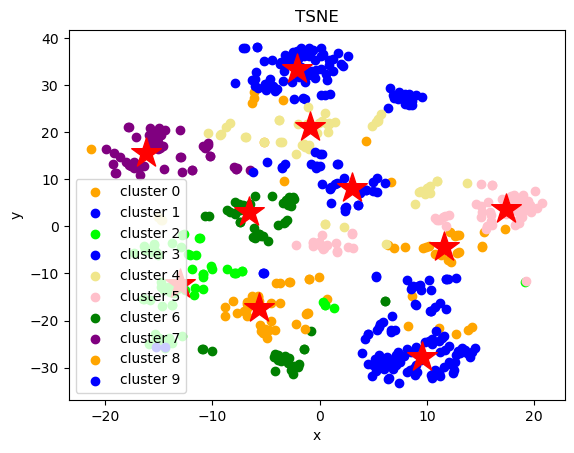

In [69]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [12]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [13]:
df.head()

sepallength  sepalwidth  petallength  petalwidth  cluster
0          5.1         3.5          1.4         0.2        1
1          4.9         3.0          1.4         0.2        1
2          4.7         3.2          1.3         0.2        1
3          4.6         3.1          1.5         0.2        1
4          5.0         3.6          1.4         0.2        1

In [14]:
df.tail()

sepallength  sepalwidth  petallength  petalwidth  cluster
145          6.7         3.0          5.2         2.3        2
146          6.3         2.5          5.0         1.9        0
147          6.5         3.0          5.2         2.0        2
148          6.2         3.4          5.4         2.3        2
149          5.9         3.0          5.1         1.8        0

#### Compute the mean value of each attribute for each cluster

In [15]:
df.groupby('cluster').mean()

sepallength  sepalwidth  petallength  petalwidth
cluster                                                  
0           5.901613    2.748387     4.393548    1.433871
1           5.006000    3.418000     1.464000    0.244000
2           6.850000    3.073684     5.742105    2.071053

#### Conclusion

By looking at the table above we can argue that:
* Cluster 2 are large iris flowers with the largest petals out of the three types.
* Cluster 0 are iris flowers with small petals (notably smaller than the other two types) but with wide sepals, the widest sepals of all three types. This is also the cluster that is clearly differentiated from the other two clusters in the scatter plots.
* Cluster 1 flowers are slightly smaller than cluster 2 flowers with a most notable difference in the width of the petals.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._